[2025-11-03 11:13:59,471 INFO MPI#0000] generating and saving cmb simulations
[2025-11-03 11:13:59,724 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2025-11-03 11:13:59,724 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2025-11-03 11:14:00,831 INFO MPI#0000] generating and saving fg simulations
[2025-11-03 11:14:00,832 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2025-11-03 11:14:00,834 INFO MPI#0000] NSIDE = 512
[2025-11-03 11:14:00,835 INFO MPI#0000] ORDERING = RING in fits file
[2025-11-03 11:14:00,835 INFO MPI#0000] INDXSCHM = IMPLICIT
[2025-11-03 11:14:00,856 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2025-11-03 11:14:00,858 INFO MPI#0000] NSIDE = 512
[2025-11-03 11:14:00,859 INFO MPI#0000] ORDERING = RING in fits file
[2025-11-03 11:14:00,859 INFO MPI#0000] INDXSCHM = IMPLICIT
[2025-11-03 11:14:00,875 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2025-11-03 11:14

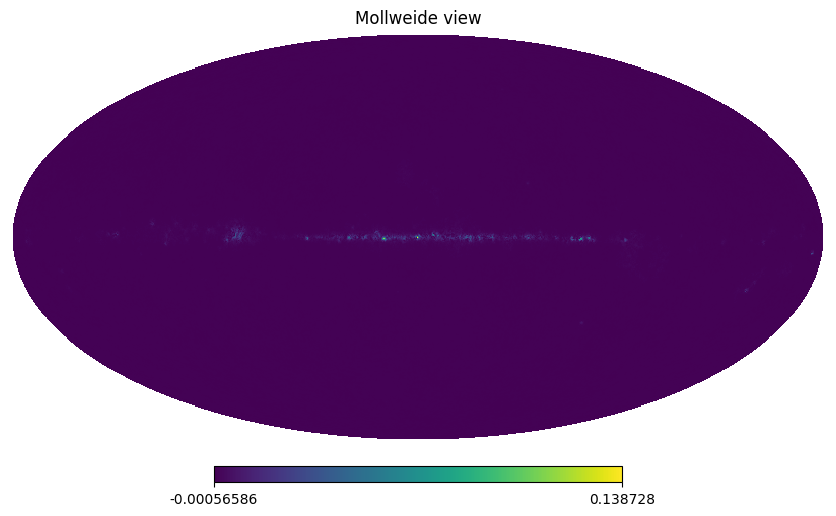

In [12]:
import litebird_sim as lbs
import healpy 

nside = 512

sim = lbs.Simulation(base_path="../output", random_seed=12345, imo=lbs.Imo(flatfile_location=lbs.PTEP_IMO_LOCATION))

# Classe che specifica come le mappe del cielo devono essere generate da PySM3
params = lbs.MbsParameters(
    make_cmb=True, # segnale CMB
    make_fg=True, # segnale di foreground
    fg_models=["pysm_synch_0", "pysm_freefree_1"],
    nside=nside,
)


# Classe utilizzata per generare mappe sintetiche del cielo partendo dalla definizione di un set di canali di frequenza e rilevatori
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=[
        lbs.FreqChannelInfo.from_imo(
            sim.imo,
            "/releases/vPTEP/satellite/LFT/L1-040/channel_info",
        ),
    ],
)


# Restituisce una coppia (maps, saved_maps)
(healpix_maps, file_paths) = mbs.run_all() 

healpy.mollview(healpix_maps["L1-040"][0])